# Statistics and Data Science 365/565
## Due September, 15 11:59pm

In [1]:
netid = "wc549"
name = "Joanna Chen"
print(netid)
print(name)

wc549
Joanna Chen


In [2]:
assert not netid == "xxx"

In [3]:
collaborators = "None"

In [4]:
import pandas as pd
import numpy as np

\newcommand{\trans}{{\scriptstyle T}}
\newcommand{\reals}{\mathbb R}
\newcommand{\argmin}{\mathop{\rm arg\,min}}
\let\hat\widehat

Fill in your solutions in the notebook `Assignment 1.ipynb` and submit the results to gradescope.

Make sure that all python cells run and do not have errors. The cell below has an error. Please fix it.

In [5]:
# assert 1==0 #this is a python cell 
# fixed version
assert 0==0 #this is a python cell 
assert 1==1 #this is a python cell 

Python cells are like the one above that have an `In [number]` in front of them. Markdown cells are just text cells like this one.

This homework explores linear regression and gives you a chance to practice using python.

# Problem 0: Two views on the average (mean) (10 pts)

Suppose we have a collection of real numbers, $y_1,...,y_n \in \mathbb{R}$. We would like to find a summary of those numbers.

## View 1. Error perspective
Let's find one number $\hat{\mu}$ that approximates the rest of the $y_i$ well. One idea is to find such a number that minimizes the residual sum of squares. That is

$$
\hat{\mu} = \arg \min_\mu \sum_{i=1}^n (y_i - \mu)^2
$$

We can define the function $f(\mu) = \sum_{i=1}^n (y_i - \mu)^2$. We want to find the $\mu$ that minimizes $f(\mu)$. We will get to this later, but for now just know that we can set the derivative of $f(\mu)$ to $0$ and solve for $\mu$ to find $\hat{\mu}$. As a warmup, if $n=2$, then

$$
\frac{d f(\mu)}{d \mu} = 2 (\mu - y_1) + 2(\mu - y_2)
$$
So solving, we get $\hat{\mu} = \frac{y_1+y_2}{2}$

### Part a) Now solve for the general case of $n$. (2 pts)
Show your work. The answer should be $\hat{\mu} = \bar{y} = \frac{1}{n} \sum_{i=1}^n y_i$


ANS: Set $\frac{d f(\mu)}{d \mu}=0$, we get $-2 \sum_{i=1}^{n}\left(y_{i}-\mu\right)=0$. That means $\sum_{i=1}^{n} y_{i}-\sum_{i=1}^{n} \mu=0$.   Note that  $\sum_{i=1}^{n} y_{i}=\sum_{i=1}^{n} \bar{y}$ and $\sum_{i=1}^{n} \mu=n \mu$. Therefore, $\sum_{i=1}^{n} \bar{y}-n \mu=0 \Rightarrow n \bar{y}-n \mu=0 \Rightarrow \hat{\mu}=\bar{y}$


## View 2. Maximum likelihood estimate perspective
Now another view is to model the data as $y_i = \mu^* + \epsilon_i$, where $\epsilon_i \sim N(0,\sigma^2)$ is the error.

### Part b) What is the distribution of $y_i$? (2 pts)

ANS: $y_{i} \sim N\left(\mu^*, \sigma^{2}\right)$

### Part c) Write down the probability density function of $y_i$ as a function of $\mu^*$. Call that $f_{\mu^*}(y_i)$. (3 pts)

ANS: $f_{\mu^*}\left(y_{i}\right)=\frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{\left(y_{i}-\mu^{*}\right)^{2}}{2 \sigma^{2}}}$

### Part d) Compute the log-likelihood of the observed data (2 pts)

Recall that if we observe $n$ independent and identically distributed copies of data drawn from a pdf, then the likelihood of a parameter given the observed data is
$$
L(\mu) = \prod_{i=1}^n f_{\mu}(y_i)
$$
The log-likelihood is simply the log of that.

ANS: 

$l:=\log L(\mu)=\log \prod_{i=1}^{n} f_{\mu}(y_i)
=\log \{\prod_{i=1}^{n}\frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{(y_i-\mu)^{2}}{2 \sigma^{2}}}\}
= \log (\left(\frac{1}{\sigma \sqrt{2 \pi}}\right)^{n} e^{-\frac{1}{2 \sigma^{2}} \sum_{i=1}^{n}\left(y_{i}-\mu\right)^{2}})$

$=n \log \frac{1}{\sigma \sqrt{2 \pi}}-\frac{1}{2\sigma^{2}} \sum_{i=1}^{n}\left(y_{i}-\mu\right)^{2}=-\frac{n}{2} \log \left(\sigma^{2} 2 \pi\right) -\frac{1}{2 \sigma^{2}} \sum_{i=1}^{n}\left(y_{i}-\mu\right)^{2}$

### Part e) Compute the maximum likelihood estimate. (1 pts)
Do so by maximizing the above derived log-likelihood. It should have a very easy form.

ANS: 

$\begin{aligned}0=\frac{\partial l}{\partial \mu}=\frac{1}{\sigma^{2}} \sum_{i=1}^{n}\left(y_{i}-\mu\right)=0 \Rightarrow \hat{\mu}=\bar{y} \end{aligned}$ by (a)

$\begin{aligned} 0=\frac{\partial l}{\partial \sigma^{2}} &=\frac{\partial\left(-\frac{n}{2} \log \sigma^{2}-\frac{n}{2} \log 2 \pi\right)}{\partial \sigma^{2}}+\frac{1}{2\sigma^4} \sum_{i=1}^{n}\left(y_{i}-\mu\right)^{2} \\ &=-\frac{n}{2\sigma^{2}}+\frac{1}{2\sigma^{4}} \sum_{i=1}^{n}\left(y_{i}-\mu\right)^{2} \end{aligned}$


$\begin{aligned}\frac{n}{2}=\frac{1}{2\sigma^{2}} \sum_{i=1}^{n}\left(y_{i}-\mu\right)^{2} \Rightarrow \hat{\sigma}^{2}=\frac{1}{n} \sum_{i=1}^{n}\left(y_{i}-\mu\right)^{2}\end{aligned}$




# Problem 1: Two views of linear regression (20 points)

Recall that in linear regression we model each response $Y_i$ as a linear combination of input variables $X_{i,p}$ and noise. That is
$$
Y_i = \beta_{0} + \beta_{1}X_{i,1} + ... + \beta_{p}X_{i,p} + \epsilon_{i}
$$
which can be written in matrix form as
$$
Y = X \beta + \epsilon
$$
where $Y \in {\mathbb R}^n$ is the vector of responses (outcomes), $X \in {\mathbb R}^{n \times (p + 1)}$ is the design matrix, where each row is a data point, and $\beta \in \mathbb{R}^{p + 1}$ is the vector of parameters, including the intercept, and $\epsilon \in {\mathbb R}^n$ is a noise (error) vector. Assume throughout this problem that the matrix $X^T X$ is invertible.

## View 1: $\hat \beta$ minimizes the Euclidean distance between $Y$ and $X \beta$. (10 pts)
Suppose we make no assumptions about $\epsilon$. We simply want to find the $\beta$ that minimizes the Euclidean distance between $Y$ and $X \beta$, i.e., the $\ell_2$ norm of $Y - X \beta$. That is, we seek
$$
\hat \beta = \arg \min_{\beta \in \mathbb{R}^p} \Vert{Y - X \beta \Vert}^2.
$$
Derive an explicit form for the minimzer $\hat \beta$. Your derivation should
involve calculating the gradient of the objective function $f(\beta) = \|Y-X\beta\|^2$,
and solving for the $\beta$ that makes the gradient zero.  Express
your solution as a function of the matrix $X$ and the vector $Y$. (If you get stuck, try to first find a clean way to write the gradient with respect to $\beta$ of the $\ell_2$ norm function $g(\beta) = \|\beta\|^2$.)

ANS:

Since 
$f(\beta) = (Y-X \beta)^{\top}(Y-X \beta) = Y^{\top}Y - \beta^{\top}X^{\top}Y - Y^{\top}X\beta + \beta^{\top}X^{\top}X\beta \\
= Y^{\top}Y - Y^{\top}X\beta - Y^{\top}X\beta + \beta^{\top}X^{\top}X\beta  \\
= Y^{\top} Y-2 Y^{\top}X\beta+\beta^{\top} X^{\top} X \beta$.

Take the derivate of $\beta$, we have
$$
\begin{aligned} \frac{\partial}{\partial \beta} f(\beta) &=\frac{\partial}{\partial \beta}(Y^{\top} Y-2 Y^{\top}X\beta+\beta^{\top} X^{\top} X \beta) \\ &= 0 -  2 (Y^{\top}X)^{\top}  + 2X^{\top} X \beta \\
&= -2X^{\top}Y + 2X^{\top} X \beta.
\end{aligned}
$$
 
Then we set the derivative equal to zero, we get
$$
\begin{aligned}
& -2X^{\top}Y + 2X^{\top} X \beta = 0 \Rightarrow 2X^{\top} X \beta = 2X^{\top}Y 
\\
& \Rightarrow X^{\top} X \beta = X^{\top}Y \Rightarrow \hat\beta = (X^{\top} X)^{-1}X^{\top}Y
\end{aligned}
$$


## View 2: $\hat \beta$ is the MLE in a normal model. (9 pts)
Suppose we assume the same linear regression model as above, but now we assume that the $\epsilon_i$ are uncorrelated and identically distributed as $N(0, \sigma^2)$. Therefore, we can write
$$
Y \sim N(X \beta, \sigma^2 I_n),
$$
meaning that $Y$ has a multivariate normal distribution with mean $X \beta$ and diagonal covariance matrix $\sigma^2 I_n$. Recall that for a vector $X \sim N(\mu, \Sigma)$, the density is
$$
f(x) = \frac{1}{\sqrt{| 2\pi\Sigma|}} \exp \Bigl(- \frac{1}{2}(x - \mu)^{T} \Sigma^{-1} (x - \mu)\Bigr).
$$
To derive the maximum likelihood estimator under this model, 
maximize the log density of $Y$ as a function of $\beta$, assuming that $\sigma^2$ is known.
Show that the maximizer is the same as that obtained under View 1.

ANS: 
Here we want to maximize 

$$
\begin{aligned}
l(\beta):&=\log \frac{1}{\sqrt{| 2\pi\sigma^2I_n|}} \exp \Bigl(- \frac{1}{2}(Y - X\beta)^{T} (\sigma^2I_n)^{-1} (Y - X\beta)\Bigr) \\
&= \log \frac{1}{{ (2\pi)^\frac{n}{2} |\sigma^2I_n|^\frac{1}{2}}} \exp \Bigl(- \frac{1}{2}(Y - X\beta)^{T} (\sigma^2I_n)^{-1} (Y - X\beta)\Bigr) \\
&= -\frac{n}{2}\log(2\pi) - \frac{1}{2}\log|\sigma^2I_n| - \frac{1}{2}(Y - X\beta)^{T} (\sigma^2I_n)^{-1} (Y - X\beta) \\
&= -\frac{n}{2}\log(2\pi) - \frac{1}{2}\log|\sigma^2I_n| - \frac{1}{2} \sigma^{-2} (Y - X\beta)^{T} I_n^{-1} (Y - X\beta) \\
.
\end{aligned}$$

Take the derivative w.r.t $\beta$, we get

$$
\begin{aligned} \frac{\partial}{\partial \beta} l(\beta) &=-2X^{\top}Y + 2X^{\top} X \beta.
\end{aligned}$$
 
Then, by View 1, $-2X^{\top}Y + 2X^{\top} X \beta = 0$ and therefore again by View 1 $\hat\beta = (X^{\top} X)^{-1}X^{\top}Y. $

## Connect the mean and linear regression. (1 pt)
Argue that the mean is just linear regression for the special case where $X_i = 1$ for all $i$.

Remember that the matrix $X$ is $n×(p+1)$ in our problem. We take the i-th row of $X$ to be $(1,x^T_i)$. So, taking $x_i=1$ is now redundant. So we can just remove it. When $X=[1,...,1]^\top\in\mathbb{R}^n$, $\hat\beta=(X^{\top}X)^{-1}X^{\top}Y=\bar{y}$$\hat\beta=(X^{\top}X)^{-1}X^{\top}Y=\bar{y}$. Therefore the mean of y is just the weight (coefficient) of linear regression where $X_i$ = 1 for all $i$.


# Problem 2: Linear regression and classification (70 points)

Citi Bike is a public bicycle sharing system in New York City. There are hundreds of bike stations scattered throughout the city. Customers can check out a bike at any station and return it at any other station. Citi Bike caters to both commuters and tourists. Details on this program can be found at https://www.citibikenyc.com/

For this problem, you will build models to predict Citi Bike usage, in number of trips per day.
The dataset consists of Citi Bike usage information and weather data recorded from Central Park. 

Date files: `citibike_*.csv`, `weather.csv`

In the `citibike_*.csv` files, we see:

1. date

2. trips: the total number of Citi Bike trips. This is the outcome variable.

3. n_stations: the total number of Citi Bike stations in service

4. holiday: whether or not the day is a work holiday

5. month: taken from the date variable

6. dayofweek: taken from the date variable

In the `weather.csv` file, we have:

1. date

2. PRCP: amount precipitation (i.e. rainfall amount) in inches 

3. SNWD: snow depth in inches

4. SNOW: snowfall in inches

5. TMAX: maximum temperature for the day, in degrees F

6. TMIN: minimum temperature for the day, in degrees F

7. AWND: average windspeed

You are provided a training set consisting of data from 7/1/2013 to 3/31/2016, and a test set consisting of data after 4/1/2016. The weather file contains weather data for the entire year. 

## Part a: Read in and merge the data. (5 pts)

To read in the data, you can run, for example:

In [6]:
train = pd.read_csv("citibike_train.csv")
test = pd.read_csv("citibike_test.csv")

In [7]:
weather = pd.read_csv("weather.csv")

Merge the training and test data with the weather data, by date. Once you have successfully merged the data, you may drop the "date" variable; we will not need it for the rest of this assignment.

In [8]:
merged_train = train.merge(weather,on='date')

In [9]:
merged_test =  test.merge(weather,on='date') #MERGE THE TEST SET WITH THE WEATHER DATASET HERE

Drop the date column here

In [10]:
merged_train_drop = merged_train.drop('date',axis=1)

In [11]:
merged_test_drop  = merged_test.drop('date',axis=1)

## Part b: Visualize data. (10 pts)

As always, before you start any modeling, you should look at the data. Make plots of some of the numeric variables. Look for outliers and strange values. Look for missing data signified by NA. Comment on any steps you take to remove entries or otherwise process the data. Also comment on whether any predictors are strongly correlated with each other. Plot the max temperature against the min temperature. Is there a relationship? What's the correlation between each predictor (feature) against the length of trips?

### Part b (1) Data merging and visualization
We first merged the train set and test set to visualize the full datasets. Then we apply boxplots to loo for outliers. 

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
print(merged_train_drop.shape)
print(merged_test_drop.shape)
# concatenate the train set and test set
merged_all_drop = pd.concat([merged_train_drop, merged_test_drop])
merged_all_drop

(1001, 11)
(183, 11)


,trips,n_stations,holiday,month,dayofweek,PRCP,SNWD,SNOW,TMAX,TMIN,AWND
0,16650,326,False,Jul,Mon,0.84,0.0,0.0,77,72,3.1
1,22745,327,False,Jul,Tues,0.08,0.0,0.0,82,72,2.7
2,21864,326,False,Jul,Wed,0.53,0.0,0.0,83,73,4.3
3,22326,326,True,Jul,Thurs,0.00,0.0,0.0,87,75,4.3
4,21842,325,False,Jul,Fri,0.00,0.0,0.0,90,76,4.9
...,...,...,...,...,...,...,...,...,...,...,...
178,45436,568,True,Sep,Mon,0.00,0.0,0.0,84,65,7.6
179,52447,573,False,Sep,Tues,0.00,0.0,0.0,80,71,9.6
180,60500,573,False,Sep,Wed,0.00,0.0,0.0,85,71,6.5
181,61596,573,False,Sep,Thurs,0.00,0.0,0.0,89,71,2.7


Text(0.5, 1.0, 'n_stations vs Trips')

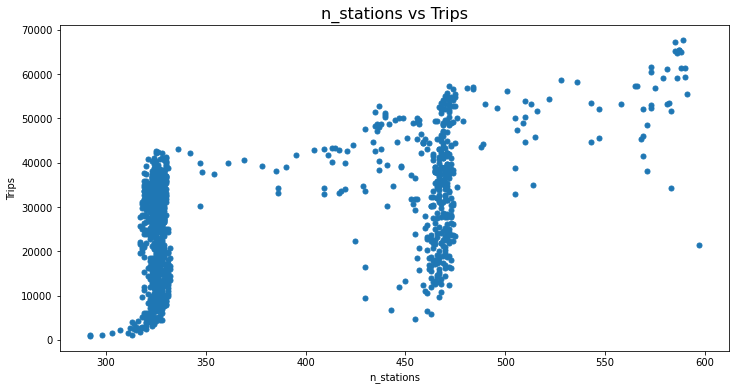

In [14]:
fig=plt.figure(figsize=(12,6))
plt.plot(merged_all_drop.n_stations,merged_all_drop.trips,'.',markersize=10)
plt.xlabel('n_stations')
plt.ylabel('Trips');
plt.title('n_stations vs Trips', fontsize=16)

Text(0.5, 1.0, 'PRCP vs Trips')

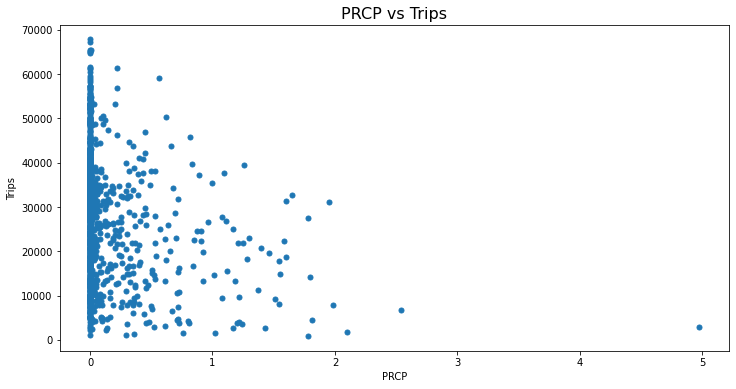

In [15]:
fig=plt.figure(figsize=(12,6))
plt.plot(merged_all_drop.PRCP,merged_all_drop.trips,'.',markersize=10)
plt.xlabel('PRCP')
plt.ylabel('Trips');
plt.title('PRCP vs Trips', fontsize=16)

It looks like there's an PRCP outlier close to 5.


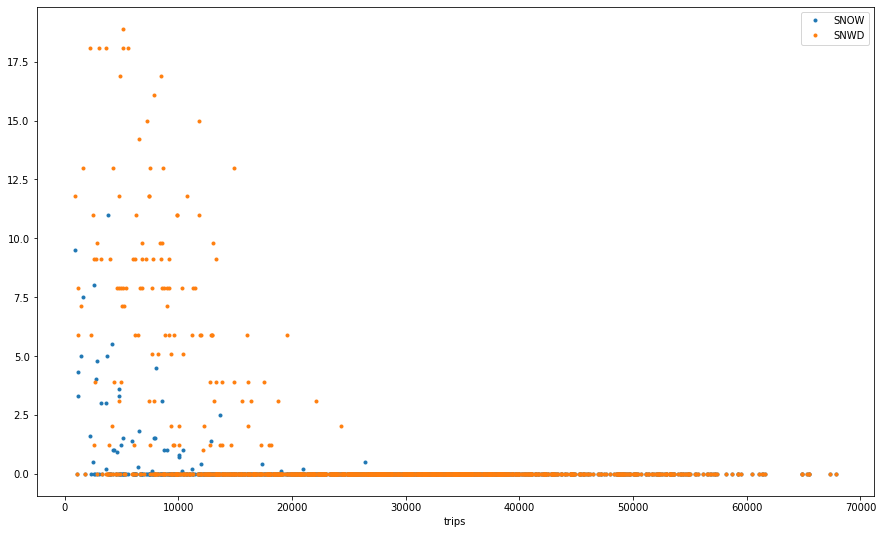

In [16]:
merged_all_drop.plot(x="trips", y=["SNOW", "SNWD"],marker='.',linestyle='',figsize=(15,9))

The value of SNOW and SNWD are mainly clustered around 0. They gradually become sparse when they are greater than around 0. These sparse values may be considered as outliers. 

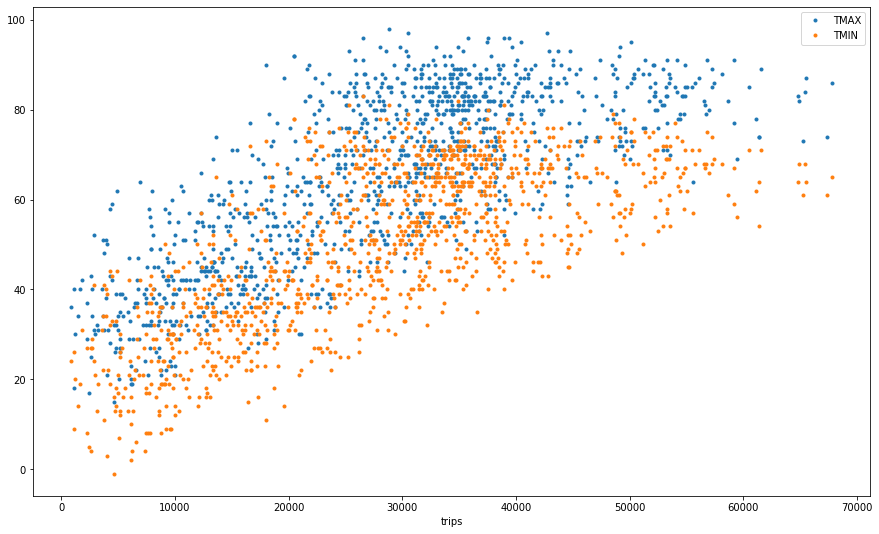

In [17]:
merged_all_drop.plot(x="trips", y=["TMAX", "TMIN"],marker='.',linestyle='',figsize=(15,9))

It looks like there's no outliers for both TMAX and TMIN. We can verify by box plots.

Text(0.5, 1.0, 'Max temperature vs min temperature')

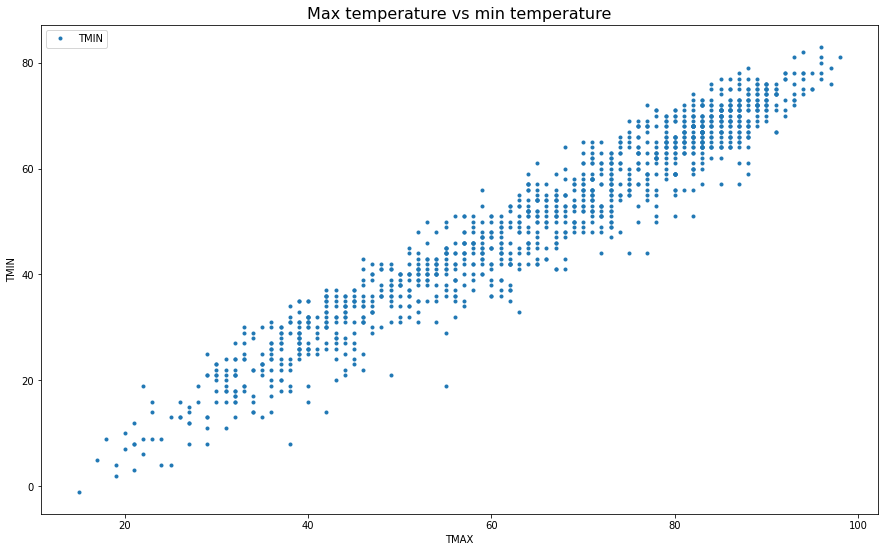

In [18]:
# plot max temperature against the min temperature
merged_all_drop.plot(x="TMAX", y="TMIN",marker='.',linestyle='',figsize=(15,9))
plt.xlabel('TMAX')
plt.ylabel('TMIN');
plt.title('Max temperature vs min temperature', fontsize=16)

{'boxes': [<matplotlib.lines.Line2D at 0x7f7f3ab3f7f0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f7f3ab4f240>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7f3ab4fcc0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f7f3ab4f940>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f7f3ab3fb00>,
  <matplotlib.lines.Line2D at 0x7f7f3ab3fe80>]}

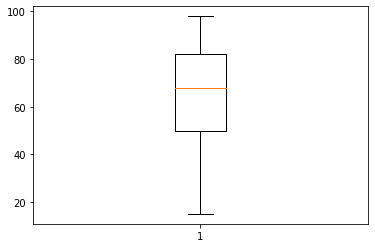

In [19]:
plt.boxplot(merged_all_drop['TMAX'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f7f3aaa2e80>],
 'caps': [<matplotlib.lines.Line2D at 0x7f7f3aab08d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7f3aabb390>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f7f3aab0fd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f7f3aab01d0>,
  <matplotlib.lines.Line2D at 0x7f7f3aab0550>]}

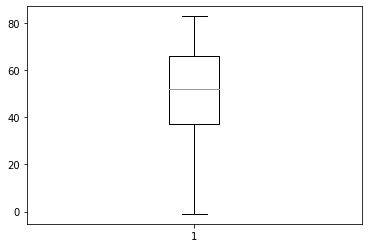

In [20]:
plt.boxplot(merged_all_drop['TMIN'])

### Part b (2) Missing value detection
Look for missing data signified by NA.

In [21]:
merged_all_drop.isnull().sum()

trips         0
n_stations    0
holiday       0
month         0
dayofweek     0
PRCP          0
SNWD          0
SNOW          0
TMAX          0
TMIN          0
AWND          0
dtype: int64

In [22]:
print(train.isnull().any())
print(test.isnull().any())

date          False
trips         False
n_stations    False
holiday       False
month         False
dayofweek     False
dtype: bool
date          False
trips         False
n_stations    False
holiday       False
month         False
dayofweek     False
dtype: bool


There's no missing values!

### Part b (3) Other Data Processing Steps

#### Part b (3.1) Dealing with outlier

In [23]:
from scipy import stats
merged_all_drop.shape

(1184, 11)

In [24]:
cols_to_loop = ['n_stations','PRCP', 'SNWD','SNOW', 'TMAX', 'TMIN', 'AWND']
idx_to_rm_train = []
for column in cols_to_loop:
  col = merged_train_drop[column]
  idx_to_rm_train.extend(col.index[col.mask((col - col.mean()).abs() > 3 * col.std()).isnull()].tolist())
idx_to_rm_train = list(set(idx_to_rm_train))

In [25]:
cols_to_loop = ['n_stations','PRCP', 'SNWD','SNOW', 'TMAX', 'TMIN', 'AWND']
idx_to_rm_test = []
for column in cols_to_loop:
  col = merged_test_drop[column]
  idx_to_rm_test.extend(col.index[col.mask((col - col.mean()).abs() > 3 * col.std()).isnull()].tolist())
idx_to_rm_test = list(set(idx_to_rm_test))

In [26]:
print(idx_to_rm_train)
print(idx_to_rm_test)

[513, 771, 899, 611, 612, 905, 523, 613, 526, 271, 658, 614, 149, 615, 923, 801, 166, 303, 945, 181, 566, 821, 185, 186, 699, 572, 574, 319, 575, 964, 581, 73, 460, 205, 604, 204, 849, 209, 596, 343, 600, 217, 601, 347, 219, 602, 478, 603, 224, 225, 226, 227, 228, 229, 230, 871, 231, 232, 233, 234, 235, 236, 606, 367, 607, 616, 617, 627, 608, 605, 880, 759, 504, 609, 881, 379, 610]
[34, 35, 36, 37, 39, 138, 139, 108, 140, 112, 115, 53, 86, 25]


In [27]:
# Remove the outlier index on each training and testing set
# merged_train_drop = merged_train_drop.drop(idx_to_rm_train)
# merged_test_drop = merged_test_drop.drop(idx_to_rm_test)

#### Part b (3.2) Correlations

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


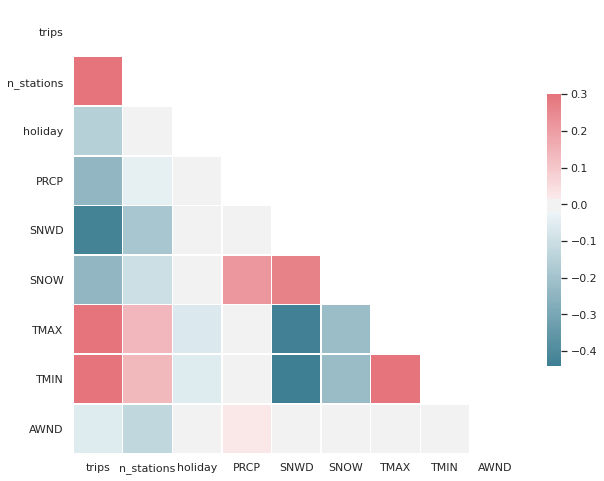

In [28]:
import seaborn as sns
sns.set(style="white")
# correlation matrix
corr = merged_all_drop.corr()

# create a mask for upper triangle oft corr. matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Correlation between each predictor (feature) against the number of trips:

In [29]:
from scipy.stats import pearsonr

# calculate Pearson's correlation
cols_to_loop = ['n_stations','PRCP', 'SNWD','SNOW', 'TMAX', 'TMIN', 'AWND']
for i in cols_to_loop:
  corr, _ = pearsonr(merged_all_drop[i],merged_all_drop["trips"] )
  print(i,'Pearsons correlation: %.3f' % corr)

n_stations Pearsons correlation: 0.531
PRCP Pearsons correlation: -0.239
SNWD Pearsons correlation: -0.425
SNOW Pearsons correlation: -0.240
TMAX Pearsons correlation: 0.748
TMIN Pearsons correlation: 0.720
AWND Pearsons correlation: -0.055


In [30]:
cols_to_loop = ['n_stations','PRCP', 'SNWD','SNOW', 'TMAX', 'TMIN', 'AWND']
for i in cols_to_loop:
    for j in cols_to_loop:
      corr, _ = pearsonr(merged_all_drop[i],merged_all_drop[j] )
      print(i,j,'Pearsons correlation: %.3f' % corr)

n_stations n_stations Pearsons correlation: 1.000
n_stations PRCP Pearsons correlation: -0.039
n_stations SNWD Pearsons correlation: -0.186
n_stations SNOW Pearsons correlation: -0.098
n_stations TMAX Pearsons correlation: 0.140
n_stations TMIN Pearsons correlation: 0.137
n_stations AWND Pearsons correlation: -0.126
PRCP n_stations Pearsons correlation: -0.039
PRCP PRCP Pearsons correlation: 1.000
PRCP SNWD Pearsons correlation: 0.012
PRCP SNOW Pearsons correlation: 0.218
PRCP TMAX Pearsons correlation: -0.018
PRCP TMIN Pearsons correlation: 0.006
PRCP AWND Pearsons correlation: 0.027
SNWD n_stations Pearsons correlation: -0.186
SNWD PRCP Pearsons correlation: 0.012
SNWD SNWD Pearsons correlation: 1.000
SNWD SNOW Pearsons correlation: 0.267
SNWD TMAX Pearsons correlation: -0.430
SNWD TMIN Pearsons correlation: -0.441
SNWD AWND Pearsons correlation: 0.015
SNOW n_stations Pearsons correlation: -0.098
SNOW PRCP Pearsons correlation: 0.218
SNOW SNWD Pearsons correlation: 0.267
SNOW SNOW Pe

Include your discussion of the plots, outliers, and other things you noticed here

There are some comments under each plot and here’s a summary. We determine the outlier and strange if the z-score is greater than 3. There are 77 outliers in the train set and 14 in the test set. We can remove the rows with the outlier values. There is no missing data in both train/testing set. Correlations among predictors are within [−0.4,0.3], which are not strongly correlated to each other. But Variable TMIN, TMAX have strong correlations 0.966. There’s a linear relationship between max temperature and min temperature. TMIN and TMAX also have high correlation to the number of trips.

## Comment

For the rest of this problem, you will train your models on the training data and evaluate them on the test data.

## Part c: Linear regression (25 pts)

Fit a linear regression model to predict the number of trips. Include all the covariates (aka, predictors, features) in the data. Print the summary of your model using the statsmodels `summary` command. 

In [31]:
import statsmodels.formula.api as smf

In [32]:
X_train = merged_train_drop.iloc[:,1:]
y_train = merged_train_drop.trips
X_test = merged_test_drop.iloc[:,1:]
y_test = merged_test_drop.trips

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train['month'] = le.fit_transform(X_train['month'])
X_train['dayofweek'] = le.fit_transform(X_train['dayofweek'])
X_test['month'] = le.fit_transform(X_test['month'])
X_test['dayofweek'] = le.fit_transform(X_test['dayofweek'])

In [34]:
X_train.head()

,n_stations,holiday,month,dayofweek,PRCP,SNWD,SNOW,TMAX,TMIN,AWND
0,326,False,5,1,0.84,0.0,0.0,77,72,3.1
1,327,False,5,5,0.08,0.0,0.0,82,72,2.7
2,326,False,5,6,0.53,0.0,0.0,83,73,4.3
3,326,True,5,4,0.00,0.0,0.0,87,75,4.3
4,325,False,5,0,0.00,0.0,0.0,90,76,4.9


In [35]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
y_pred_tr = lm.predict(X_train)
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)
train_r2 = r2_score(y_train, y_pred_tr)
train_mse = mean_squared_error(y_train, y_pred_tr)
print('train mse: %.2f train_r2: %.2f test mse: %.2f test r2: %.2f' % (train_mse, train_r2, test_mse, test_r2))

train mse: 27486393.31 train_r2: 0.79 test mse: 109157492.89 test r2: 0.15


In [36]:
# Because there's no summary in sklearn, I switch to use statsmodels
mod = smf.ols(formula='trips ~ (n_stations+holiday+month+dayofweek+PRCP+SNWD+SNOW+TMAX+TMIN+AWND)+1', data=merged_train).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     268.5
Date:                Wed, 16 Sep 2020   Prob (F-statistic):               0.00
Time:                        03:22:17   Log-Likelihood:                -9747.3
No. Observations:                1001   AIC:                         1.955e+04
Df Residuals:                     975   BIC:                         1.967e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.611e+04   1320

Find the "best" linear model that uses only $q$ variables (where including the intercept counts as one of the variables),
for each $q=1,2,3,4,5$.  It is up to you to choose how to select the "best" subset of variables. 
(A categorical variable or factor such as "month" corresponds to a single variable.) Describe how you selected 
each model. Give the $R^2$ and the mean squared error (MSE) on the training and test set for each of the models. 
Which model gives the best fit on the training set? Which on the test set? Comment on your findings.

ANS:

I would like to use forward selection
- Start with the intercept-only model
- For every possible model that adds one term, evaluate the "score" (MSE, $R^2$, smallest p-value)
- Choose the one with the best $R^2$
- Repeat until either adding a new term doesn’t improve themodel or all variables are included

In [37]:
# q = 0
mod = smf.ols(formula='trips ~ 1', data=merged_train_drop)
res = mod.fit()
print("MSE",np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2) / merged_train_drop.shape[0]) 
print("R2", 1-np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2)/np.sum((merged_train_drop['trips'])**2))

MSE 132519912.4050974
R2 0.8253102302780994


In [38]:
# q = 1
mod = smf.ols(formula='trips ~ n_stations + 1', data=merged_train_drop)
res = mod.fit()
print("+n_stations trips MSE",np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2) / merged_train_drop.shape[0]) 
print("+n_stations R2", 1-np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2)/np.sum((merged_train_drop['trips'])**2))


mod = smf.ols(formula='trips ~ holiday + 1', data=merged_train_drop)
res = mod.fit()
print("+holiday MSE",np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2) / merged_train_drop.shape[0]) 
print("+holiday R2", 1-np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2)/np.sum((merged_train_drop['trips'])**2))


mod = smf.ols(formula='trips ~ month + 1', data=merged_train_drop)
res = mod.fit()
print("+month MSE",np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2) / merged_train_drop.shape[0]) 
print("+month R2", 1-np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2)/np.sum((merged_train_drop['trips'])**2))


mod = smf.ols(formula='trips ~ dayofweek + 1', data=merged_train_drop)
res = mod.fit()
print("+dayofweek MSE",np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2) / merged_train_drop.shape[0]) 
print("+dayofweek R2", 1-np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2)/np.sum((merged_train_drop['trips'])**2))

mod = smf.ols(formula='trips ~ PRCP + 1', data=merged_train_drop)
res = mod.fit()
print("+PRCP MSE",np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2) / merged_train_drop.shape[0]) 
print("+PRCP R2", 1-np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2)/np.sum((merged_train_drop['trips'])**2))


mod = smf.ols(formula='trips ~ SNWD + 1', data=merged_train_drop)
res = mod.fit()
print("+SNWD MSE",np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2) / merged_train_drop.shape[0]) 
print("+SNWD R2", 1-np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2)/np.sum((merged_train_drop['trips'])**2))

mod = smf.ols(formula='trips ~ SNOW + 1', data=merged_train_drop)
res = mod.fit()
print("+SNOW MSE",np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2) / merged_train_drop.shape[0]) 
print("+SNOW R2", 1-np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2)/np.sum((merged_train_drop['trips'])**2))


mod = smf.ols(formula='trips ~ TMAX + 1', data=merged_train_drop)
res = mod.fit()
print("+TMAX MSE",np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2) / merged_train_drop.shape[0]) 
print("+TMAX R2", 1-np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2)/np.sum((merged_train_drop['trips'])**2))

mod = smf.ols(formula='trips ~ TMIN + 1', data=merged_train_drop)
res = mod.fit()
print("+TMIN MSE",np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2) / merged_train_drop.shape[0]) 
print("+TMIN R2", 1-np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2)/np.sum((merged_train_drop['trips'])**2))

mod = smf.ols(formula='trips ~ AWND + 1', data=merged_train_drop)
res = mod.fit()
print("+AWND MSE",np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2) / merged_train_drop.shape[0]) 
print("+AWND R2", 1-np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2)/np.sum((merged_train_drop['trips'])**2))

+n_stations trips MSE 125251190.6755415
+n_stations R2 0.8348919701243133
+holiday MSE 128490234.51703537
+holiday R2 0.8306222131306621
+month MSE 60982917.758135386
+month R2 0.9196113877016983
+dayofweek MSE 126712613.31635228
+dayofweek R2 0.8329655005096247
+PRCP MSE 123101861.65509982
+PRCP R2 0.8377252484205575
+SNWD MSE 103596530.46077202
+SNWD R2 0.8634374734956132
+SNOW MSE 122924693.41638775
+SNOW R2 0.8379587942949922
+TMAX MSE 56177112.70374984
+TMAX R2 0.9259464732223757
+TMIN MSE 60830723.10544002
+TMIN R2 0.9198120130141494
+AWND MSE 132121376.10202503
+AWND R2 0.8258355869112725


TMAX gives the best R2. 

In [39]:
# q = 2
mod = smf.ols(formula='trips ~ (TMAX + n_stations) + 1', data=merged_train_drop)
res = mod.fit()
print("+n_stations trips MSE",np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2) / merged_train_drop.shape[0]) 
print("+n_stations R2", 1-np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2)/np.sum((merged_train_drop['trips'])**2))


mod = smf.ols(formula='trips ~ (TMAX + holiday) + 1', data=merged_train_drop)
res = mod.fit()
print("+holiday MSE",np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2) / merged_train_drop.shape[0]) 
print("+holiday R2", 1-np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2)/np.sum((merged_train_drop['trips'])**2))


mod = smf.ols(formula='trips ~ (TMAX + month) + 1', data=merged_train_drop)
res = mod.fit()
print("+month MSE",np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2) / merged_train_drop.shape[0]) 
print("+month R2", 1-np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2)/np.sum((merged_train_drop['trips'])**2))


mod = smf.ols(formula='trips ~ (TMAX + dayofweek) + 1', data=merged_train_drop)
res = mod.fit()
print("+dayofweek MSE",np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2) / merged_train_drop.shape[0]) 
print("+dayofweek R2", 1-np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2)/np.sum((merged_train_drop['trips'])**2))

mod = smf.ols(formula='trips ~ (TMAX + PRCP) + 1', data=merged_train_drop)
res = mod.fit()
print("+PRCP MSE",np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2) / merged_train_drop.shape[0]) 
print("+PRCP R2", 1-np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2)/np.sum((merged_train_drop['trips'])**2))


mod = smf.ols(formula='trips ~ (TMAX + SNWD) + 1', data=merged_train_drop)
res = mod.fit()
print("+SNWD MSE",np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2) / merged_train_drop.shape[0]) 
print("+SNWD R2", 1-np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2)/np.sum((merged_train_drop['trips'])**2))

mod = smf.ols(formula='trips ~ (TMAX + SNOW) + 1', data=merged_train_drop)
res = mod.fit()
print("+SNOW MSE",np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2) / merged_train_drop.shape[0]) 
print("+SNOW R2", 1-np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2)/np.sum((merged_train_drop['trips'])**2))

mod = smf.ols(formula='trips ~ (TMAX + TMIN) + 1', data=merged_train_drop)
res = mod.fit()
print("+TMIN MSE",np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2) / merged_train_drop.shape[0]) 
print("+TMIN R2", 1-np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2)/np.sum((merged_train_drop['trips'])**2))

mod = smf.ols(formula='trips ~ (TMAX + AWND) + 1', data=merged_train_drop)
res = mod.fit()
print("+AWND MSE",np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2) / merged_train_drop.shape[0]) 
print("+AWND R2", 1-np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2)/np.sum((merged_train_drop['trips'])**2))

+n_stations trips MSE 42644787.53353209
+n_stations R2 0.943784990656351
+holiday MSE 54149202.838792644
+holiday R2 0.9286196949359792
+month MSE 46798378.11805777
+month R2 0.9383096641973974
+dayofweek MSE 50033743.91233484
+dayofweek R2 0.9340447556616849
+PRCP MSE 47528906.5798819
+PRCP R2 0.9373466704370239
+SNWD MSE 52957627.20783614
+SNWD R2 0.9301904481065797
+SNOW MSE 54731550.92165602
+SNOW R2 0.9278520348111942
+TMIN MSE 56170584.95286209
+TMIN R2 0.9259550782031569
+AWND MSE 56081623.13430013
+AWND R2 0.9260723490292281


n_stations gives the best R2. 

In [40]:
# q = 3
mod = smf.ols(formula='trips ~ (n_stations + TMAX + holiday) + 1', data=merged_train_drop)
res = mod.fit()
print("+holiday MSE",np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2) / merged_train_drop.shape[0]) 
print("+holiday R2", 1-np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2)/np.sum((merged_train_drop['trips'])**2))


mod = smf.ols(formula='trips ~ (n_stations + TMAX + month) + 1', data=merged_train_drop)
res = mod.fit()
print("+month MSE",np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2) / merged_train_drop.shape[0]) 
print("+month R2", 1-np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2)/np.sum((merged_train_drop['trips'])**2))


mod = smf.ols(formula='trips ~ (n_stations + TMAX + dayofweek) + 1', data=merged_train_drop)
res = mod.fit()
print("+dayofweek MSE",np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2) / merged_train_drop.shape[0]) 
print("+dayofweek R2", 1-np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2)/np.sum((merged_train_drop['trips'])**2))

mod = smf.ols(formula='trips ~ (n_stations + TMAX + PRCP) + 1', data=merged_train_drop)
res = mod.fit()
print("+PRCP MSE",np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2) / merged_train_drop.shape[0]) 
print("+PRCP R2", 1-np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2)/np.sum((merged_train_drop['trips'])**2))


mod = smf.ols(formula='trips ~ (n_stations + TMAX + SNWD) + 1', data=merged_train_drop)
res = mod.fit()
print("+SNWD MSE",np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2) / merged_train_drop.shape[0]) 
print("+SNWD R2", 1-np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2)/np.sum((merged_train_drop['trips'])**2))

mod = smf.ols(formula='trips ~ (n_stations + TMAX + SNOW) + 1', data=merged_train_drop)
res = mod.fit()
print("+SNOW MSE",np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2) / merged_train_drop.shape[0]) 
print("+SNOW R2", 1-np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2)/np.sum((merged_train_drop['trips'])**2))

mod = smf.ols(formula='trips ~ (n_stations + TMAX + TMIN) + 1', data=merged_train_drop)
res = mod.fit()
print("+TMIN MSE",np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2) / merged_train_drop.shape[0]) 
print("+TMIN R2", 1-np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2)/np.sum((merged_train_drop['trips'])**2))

mod = smf.ols(formula='trips ~ (n_stations + TMAX + AWND) + 1', data=merged_train_drop)
res = mod.fit()
print("+AWND MSE",np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2) / merged_train_drop.shape[0]) 
print("+AWND R2", 1-np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2)/np.sum((merged_train_drop['trips'])**2))

+holiday MSE 40500685.60960423
+holiday R2 0.9466113785142473
+month MSE 33595578.731928654
+month R2 0.9557137957168703
+dayofweek MSE 36820338.470116474
+dayofweek R2 0.9514628682460579
+PRCP MSE 34854732.309473746
+PRCP R2 0.9540539602663799
+SNWD MSE 41635908.34888768
+SNWD R2 0.9451149105849426
+SNOW MSE 42011722.11544839
+SNOW R2 0.9446195071459625
+TMIN MSE 42630449.38987028
+TMIN R2 0.943803891416011
+AWND MSE 42389861.32204792
+AWND R2 0.9441210382764559


month gives the highest R2

In [41]:
# q = 3
mod = smf.ols(formula='trips ~ (month + n_stations + TMAX + holiday) + 1', data=merged_train)
res = mod.fit()
print("+holiday MSE",np.sum((res.predict(merged_train) - merged_train['trips'])**2) / merged_train.shape[0]) 
print("+holiday R2", 1-np.sum((res.predict(merged_train) - merged_train['trips'])**2)/np.sum((merged_train['trips'])**2))

mod = smf.ols(formula='trips ~ (month + n_stations + TMAX + dayofweek) + 1', data=merged_train)
res = mod.fit()
print("+dayofweek MSE",np.sum((res.predict(merged_train) - merged_train['trips'])**2) / merged_train.shape[0]) 
print("+dayofweek R2", 1-np.sum((res.predict(merged_train) - merged_train['trips'])**2)/np.sum((merged_train['trips'])**2))

mod = smf.ols(formula='trips ~ (month + n_stations + TMAX + PRCP) + 1', data=merged_train)
res = mod.fit()
print("+PRCP MSE",np.sum((res.predict(merged_train) - merged_train['trips'])**2) / merged_train.shape[0]) 
print("+PRCP R2", 1-np.sum((res.predict(merged_train) - merged_train['trips'])**2)/np.sum((merged_train['trips'])**2))

mod = smf.ols(formula='trips ~ (month + n_stations + TMAX + SNWD) + 1', data=merged_train)
res = mod.fit()
print("+SNWD MSE",np.sum((res.predict(merged_train) - merged_train['trips'])**2) / merged_train.shape[0]) 
print("+SNWD R2", 1-np.sum((res.predict(merged_train) - merged_train['trips'])**2)/np.sum((merged_train['trips'])**2))

mod = smf.ols(formula='trips ~ (month + n_stations + TMAX + SNOW) + 1', data=merged_train)
res = mod.fit()
print("+SNOW MSE",np.sum((res.predict(merged_train) - merged_train['trips'])**2) / merged_train.shape[0]) 
print("+SNOW R2", 1-np.sum((res.predict(merged_train) - merged_train['trips'])**2)/np.sum((merged_train['trips'])**2))

mod = smf.ols(formula='trips ~ (month + n_stations + TMAX + TMIN) + 1', data=merged_train)
res = mod.fit()
print("+TMIN MSE",np.sum((res.predict(merged_train) - merged_train['trips'])**2) / merged_train.shape[0]) 
print("+TMIN R2", 1-np.sum((res.predict(merged_train) - merged_train['trips'])**2)/np.sum((merged_train['trips'])**2))

mod = smf.ols(formula='trips ~ (month + n_stations + TMAX + AWND) + 1', data=merged_train)
res = mod.fit()
print("+AWND MSE",np.sum((res.predict(merged_train) - merged_train['trips'])**2) / merged_train.shape[0]) 
print("+AWND R2", 1-np.sum((res.predict(merged_train) - merged_train['trips'])**2)/np.sum((merged_train['trips'])**2))

+holiday MSE 31671369.142985586
+holiday R2 0.9582503181449986
+dayofweek MSE 27901524.350784592
+dayofweek R2 0.9632197850476312
+PRCP MSE 26548558.880543392
+PRCP R2 0.9650032847658896
+SNWD MSE 33432501.15309716
+SNWD R2 0.95592876706854
+SNOW MSE 33249220.497589126
+SNOW R2 0.9561703704240214
+TMIN MSE 33359750.578095842
+TMIN R2 0.9560246679860962
+AWND MSE 33265829.0400748
+AWND R2 0.9561484767900039


PRCP gives the best R2. 

In [42]:
# Compute R2 and MSE on train, test set

mod = smf.ols(formula='trips ~ (PRCP + month + n_stations + TMAX) + 1', data=merged_train_drop)
res = mod.fit()
print("model 5, train MSE ",np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2) / merged_train_drop.shape[0]) 
print("model 5, train R2 ", 1-np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2)/np.sum((merged_train_drop['trips'])**2))
print("model 5, test MSE ",np.sum((res.predict(merged_test_drop) - merged_test_drop['trips'])**2) / merged_test_drop.shape[0]) 
print("model 5, test R2 ", 1-np.sum((res.predict(merged_test_drop) - merged_test_drop['trips'])**2)/np.sum((merged_test_drop['trips'])**2))

mod = smf.ols(formula='trips ~ (month + n_stations + TMAX) + 1', data=merged_train_drop)
res = mod.fit()
print("model 4, train MSE ",np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2) / merged_train_drop.shape[0]) 
print("model 4, train R2 ", 1-np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2)/np.sum((merged_train_drop['trips'])**2))
print("model 4, test MSE ",np.sum((res.predict(merged_test_drop) - merged_test_drop['trips'])**2) / merged_test_drop.shape[0]) 
print("model 4, test R2 ", 1-np.sum((res.predict(merged_test_drop) - merged_test_drop['trips'])**2)/np.sum((merged_test_drop['trips'])**2))

mod = smf.ols(formula='trips ~ (n_stations + TMAX) + 1', data=merged_train_drop)
res = mod.fit()
print("model 3, train MSE ",np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2) / merged_train_drop.shape[0]) 
print("model 3, train R2 ", 1-np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2)/np.sum((merged_train_drop['trips'])**2))
print("model 3, test MSE ",np.sum((res.predict(merged_test_drop) - merged_test_drop['trips'])**2) / merged_test_drop.shape[0]) 
print("model 3, test R2 ", 1-np.sum((res.predict(merged_test_drop) - merged_test_drop['trips'])**2)/np.sum((merged_test_drop['trips'])**2))

mod = smf.ols(formula='trips ~ (TMAX) + 1', data=merged_train_drop)
res = mod.fit()
print("model 2, train MSE ",np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2) / merged_train_drop.shape[0]) 
print("model 2, train R2 ", 1-np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2)/np.sum((merged_train_drop['trips'])**2))
print("model 2, test MSE ",np.sum((res.predict(merged_test_drop) - merged_test_drop['trips'])**2) / merged_test_drop.shape[0]) 
print("model 2, test R2 ", 1-np.sum((res.predict(merged_test_drop) - merged_test_drop['trips'])**2)/np.sum((merged_test_drop['trips'])**2))

mod = smf.ols(formula='trips ~ 1', data=merged_train_drop)
res = mod.fit()
print("model 1, train MSE ",np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2) / merged_train_drop.shape[0]) 
print("model 1, train R2 ", 1-np.sum((res.predict(merged_train_drop) - merged_train_drop['trips'])**2)/np.sum((merged_train_drop['trips'])**2))
print("model 1, test MSE ",np.sum((res.predict(merged_test_drop) - merged_test_drop['trips'])**2) / merged_test_drop.shape[0]) 
print("model 1, test R2 ", 1-np.sum((res.predict(merged_test_drop) - merged_test_drop['trips'])**2)/np.sum((merged_test_drop['trips'])**2))


model 5, train MSE  26548558.880543392
model 5, train R2  0.9650032847658896
model 5, test MSE  63018038.77638053
model 5, test R2  0.9709919671845715
model 4, train MSE  33595578.731928654
model 4, train R2  0.9557137957168703
model 4, test MSE  72340656.1718633
model 4, test R2  0.9667006436749099
model 3, train MSE  42644787.53353209
model 3, train R2  0.943784990656351
model 3, test MSE  80761363.77489337
model 3, test R2  0.9628244811154146
model 2, train MSE  56177112.70374984
model 2, train R2  0.9259464732223757
model 2, test MSE  262384900.55248773
model 2, test R2  0.8792207762525253
model 1, train MSE  132519912.4050974
model 1, train R2  0.8253102302780994
model 1, test MSE  536348828.02607244
model 1, test R2  0.7531115739874739


| model | Model                                        | train MSE    | train R2 | test MSE     | test R2 |
|-------|----------------------------------------------|--------------|----------|--------------|---------|
| 1     | trips ~ 1                                    | 132519912.40 | 0.8253   | 536348828.02 | 0.7531  |
| 2     | trips ~ TMAX + 1                             | 56177112.70  | 0.9259   | 262384900.55 | 0.8792  |
| 3     | trips ~ n_stations + TMAX + 1                | 42644787.53  | 0.9437   | 80761363.77  | 0.9628  |
| 4     | trips ~ month + n_stations + TMAX + 1        | 33595578.73  | 0.9557   | 72340656.17  | 0.9667  |
| 5     | trips ~ PRCP + month + n_stations + TMAX + 1 | 26548558.88  | 0.9650   | 63018038.77  | 0.9709  |


Model 5 gives the best fit on the training set, as well as on the training set based on $R^2$ and MSE. 
The data is pretty clean and forward selection worked well.

## Part d: KNN Classification

Now we will transform the outcome variable to allow us to do classification. Create a new vector $Y$ with entries:
$$
Y[i] = \mathbf{1} \{ \textrm{trips}[i] > \textrm{median}(trips) \}
$$

Use the median of the variable from the full data (training and test combined). After computing
the binary outcome variable $Y$, you should drop the original trips variable from the data.

#### 5 pts

In [43]:
#y = something - the median of something (the function looks a lot like np.mean)
trips_med = np.median(merged_all_drop['trips'])
y_train = merged_train_drop['trips'] > trips_med
y_test = merged_test_drop['trips'] > trips_med
#drop the original trips column from the train and test set
merged_train_drop2 = merged_train_drop.drop(columns=['trips'])
merged_test_drop2 = merged_test_drop.drop(columns = ['trips'])
#add the above constructed y vector to the respective train and test set
merged_train_drop2['trips'] = y_train
merged_test_drop2['trips'] = y_test

Recall that in $k$-nearest neighbors classification, the predicted value $\hat Y$ of $X$ is 
the majority vote of the labels for the $k$ nearest neighbors $X_i$ to $X$. We will use the Euclidean distance as our measure of distance between points. Note that the Euclidean distance doesn't make much sense for factor variables, so just drop the predictors that are categorical for this problem. Standardize the numeric predictors so that they have mean zero and constant standard deviation

#### 5 pts

In [44]:
to_drop = ['month', 'dayofweek']
merged_train_drop2 = merged_train_drop2.drop(columns = to_drop)
merged_test_drop2 = merged_test_drop2.drop(columns = to_drop)

for i in cols_to_loop:
  merged_train_drop2[i] = (merged_train_drop2[i] - np.mean(merged_train_drop2[i])) / np.std(merged_train_drop2[i])
  merged_test_drop2[i] = (merged_test_drop2[i] - np.mean(merged_train_drop2[i])) / np.std(merged_train_drop2[i])

y = merged_train_drop2['trips']
y_test = merged_test_drop2['trips']
X_train = merged_train_drop2.drop(columns = 'trips')
X_test = merged_test_drop2.drop(columns = 'trips')

Use the sklearn neighbors library to perform $k$-nearest neighbor classification. Fit a classifier for $k = 1:50$, and find the mis-classification rate on both the training and test sets for each $k$. On a single plot, show the training set error and the test set error as a function of $k$. How would you choose the optimal $k$? Comment on your findings, and in particular on the possibility of overfitting.

#### 15 pts

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder


test_error = []
train_error = []
for i in range(1, 51):
  neigh = KNeighborsClassifier(n_neighbors=i)
  neigh.fit(X_train, y)
  test_pred = neigh.predict(X_test)
  train_pred = neigh.predict(X_train)

  train_percent = (train_pred == y).sum() / len(y)
  test_percent = (test_pred == y_test).sum() / len(y_test)

  train_error.append(1 - train_percent)
  test_error.append(1 - test_percent)



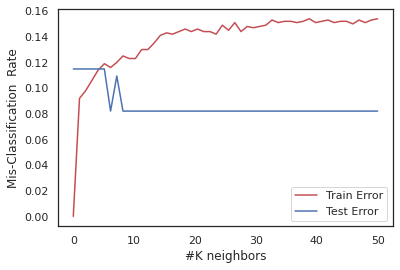

In [46]:
k = np.linspace(0, 50, 50)
plt.plot(k, train_error, 'r-', label = 'Train Error')
plt.plot(k, test_error, 'b-', label = 'Test Error')
plt.xlabel('#K neighbors')
plt.ylabel('Mis-Classification  Rate')
plt.legend()
plt.show()


#### Your discussion here (5 pts)

To pick an optimal K, I would choose just after where the train error and the test error meet, which seems to be around 7. As the number of K neighbors goes up, it seems the training error also rises. However, the test error rate goes down. This leads me to believe as the number of K neighbors rises, the model starts to underfit. By picking a K that yields an error closest to both the train and test error, we can minimize unexpected behavior from the model. However, as this is a binary classification problem, I expected the error to be a bit lower. This is why I reran the problem in the cell below but shuffling the data, as the original dataset was sorted by the original 'trips' value. The result after shuffling is much closer to what I expected, as the error lines overlap. In this case, it seems that the lower the K number, the better the model performs, and is even at 0.0% error on both the train and test sets at K = 1.

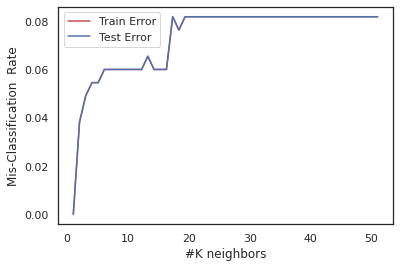

In [47]:
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

trips_med = np.median(merged_all_drop['trips'])
y_train = merged_train_drop['trips'] > trips_med
y_test = merged_test_drop['trips'] > trips_med

merged_train_drop2 = merged_train_drop.drop(columns=['trips'])
merged_test_drop2 = merged_test_drop.drop(columns = ['trips'])

merged_train_drop2['trips'] = y_train
merged_test_drop2['trips'] = y_test

to_drop = ['month', 'dayofweek']
merged_train_drop2 = merged_train_drop2.drop(columns = to_drop)
merged_test_drop2 = merged_test_drop2.drop(columns = to_drop)

for i in cols_to_loop:
  merged_train_drop2[i] = (merged_train_drop2[i] - np.mean(merged_train_drop2[i])) / np.std(merged_train_drop2[i])
  merged_test_drop2[i] = (merged_test_drop2[i] - np.mean(merged_train_drop2[i])) / np.std(merged_train_drop2[i])

merged_train_drop2 = shuffle(merged_test_drop2)
merged_test_drop2 = shuffle(merged_test_drop2)

y = merged_train_drop2['trips']
y_test = merged_test_drop2['trips']
X_train = merged_train_drop2.drop(columns = 'trips')
X_test = merged_test_drop2.drop(columns = 'trips')


test_error = []
train_error = []
for i in range(1, 51):
  neigh = KNeighborsClassifier(n_neighbors=i)
  neigh.fit(X_train, y)
  test_pred = neigh.predict(X_test)
  train_pred = neigh.predict(X_train)

  train_percent = (train_pred == y).sum() / len(y)
  test_percent = (test_pred == y_test).sum() / len(y_test)

  train_error.append(1 - train_percent)
  test_error.append(1 - test_percent)

k = np.linspace(1, 51, 50)
plt.plot(k, train_error, 'r-', label = 'Train Error')
plt.plot(k, test_error, 'b-', label = 'Test Error')
plt.xlabel('#K neighbors')
plt.ylabel('Mis-Classification  Rate')
plt.legend()
plt.show()


In [48]:
train_error[0]

0.0

In [49]:
test_error[0]

0.0